In [107]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

data_path = "/content/drive/MyDrive/Kuliah/SEM 5/COURSERA/1_Exploratory Data Analysis for Machine Learning/modul 5/ecommerce_customer_data_large.csv"
df = pd.read_csv(data_path)

print("Ukuran dataset:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ukuran dataset: (250000, 13)


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [108]:
# View column structure, data types, and empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [109]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [110]:
df.head()

df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [111]:
# Check for empty values column
df.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47382
Customer Name,0


In [112]:
df.fillna({'Returns': 0}, inplace=True)

df.isnull().sum()


,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,0
Customer Name,0


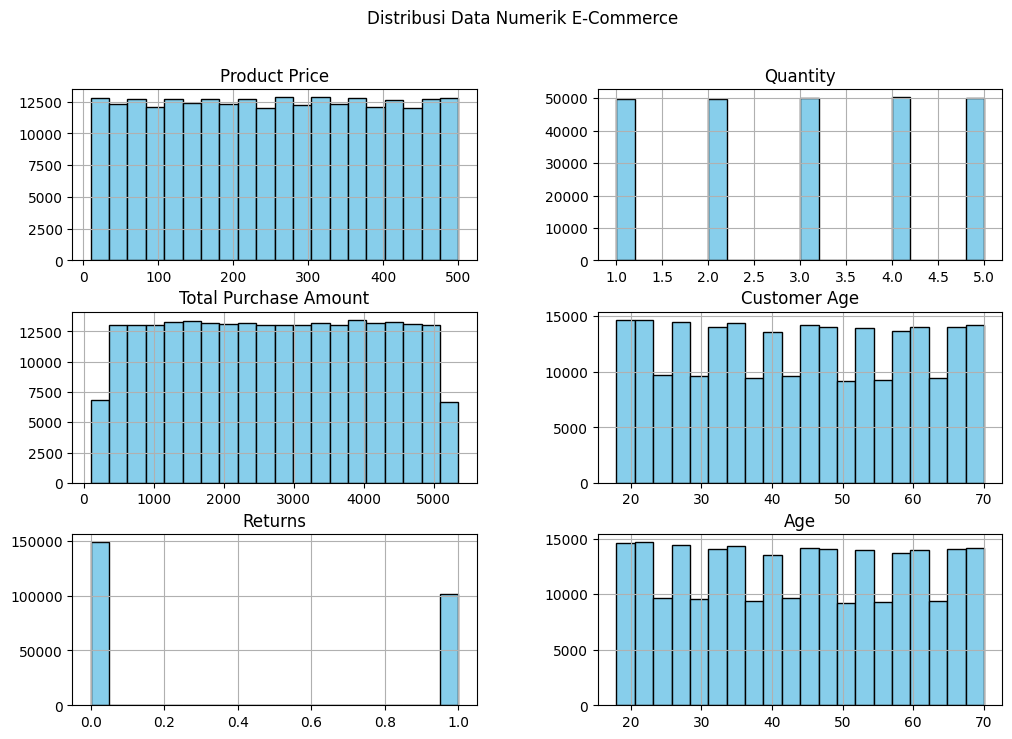

In [113]:
import matplotlib.pyplot as plt

df[['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', 'Returns', 'Age']].hist(
    bins=20, figsize=(12, 8), color='skyblue', edgecolor='black'
)
plt.suptitle('Distribusi Data Numerik E-Commerce')
plt.show()

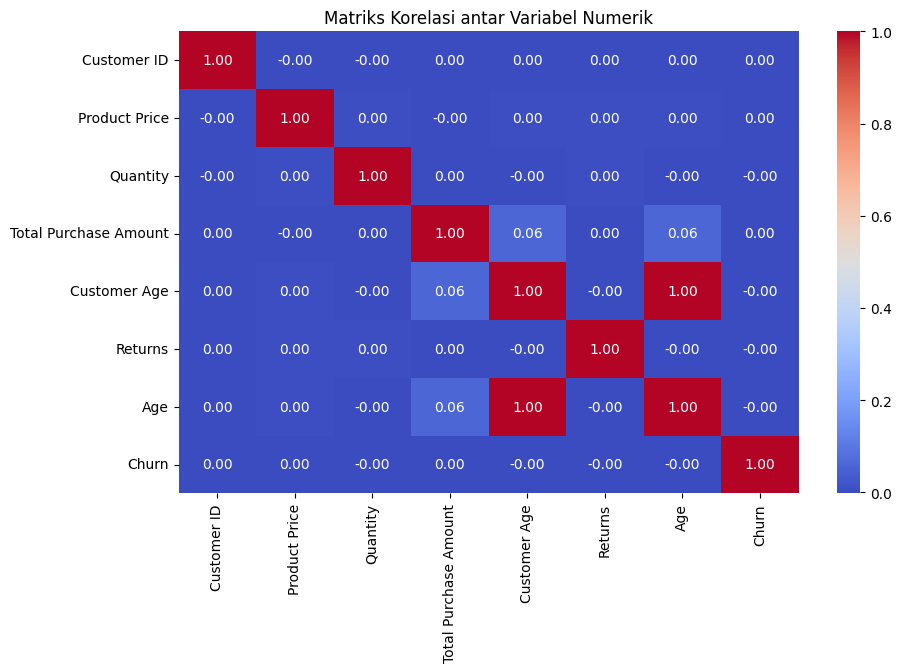

In [114]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi antar Variabel Numerik')
plt.show()

In [115]:
df.groupby('Gender')['Total Purchase Amount'].mean()

,Total Purchase Amount
Gender,
Female,2723.202728
Male,2727.544185


/tmp/ipython-input-2308239743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=df, x='Gender', palette='Set2')
/tmp/ipython-input-2308239743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], data=df, x='Payment Method', palette='Set3')


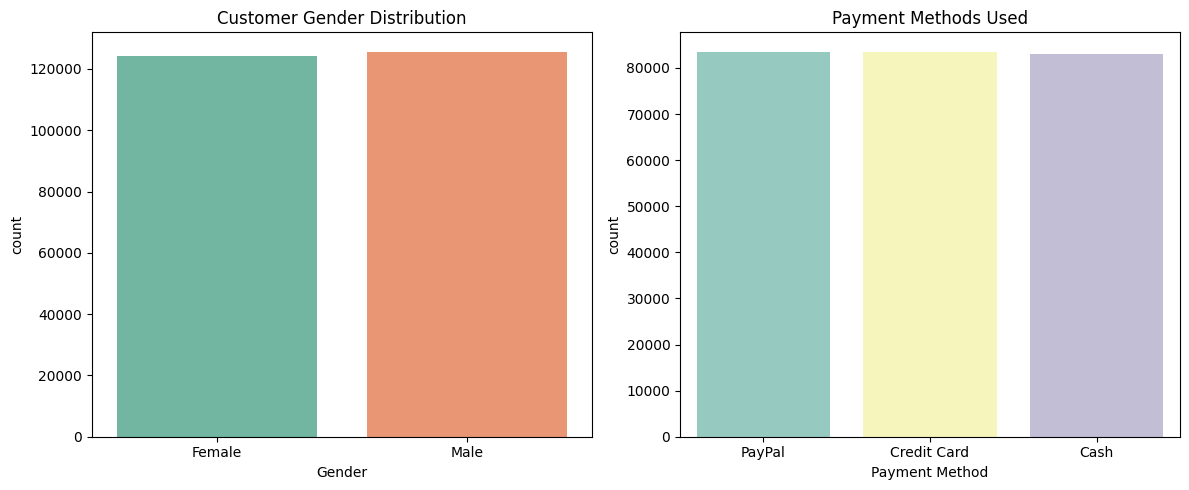

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(ax=axes[0], data=df, x='Gender', palette='Set2')
axes[0].set_title('Customer Gender Distribution')

sns.countplot(ax=axes[1], data=df, x='Payment Method', palette='Set3')
axes[1].set_title('Payment Methods Used')

plt.tight_layout()
plt.show()

In [117]:
df['Returns'].fillna(0, inplace=True)
print(df.isnull().sum())

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64


/tmp/ipython-input-2852552862.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Returns'].fillna(0, inplace=True)


In [118]:
duplicates = df.duplicated().sum()
print("Amount of duplicate data:", duplicates)

# Jika ada, hapus duplikat
df = df.drop_duplicates()

Amount of duplicate data: 0


In [119]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')
print(df['Purchase Date'].head())

0   2023-05-03 21:30:02
1   2021-05-16 13:57:44
2   2020-07-13 06:16:57
3   2023-01-17 13:14:36
4   2021-05-01 11:29:27
Name: Purchase Date, dtype: datetime64[ns]


In [120]:
print(df.dtypes)

Customer ID                       int64
Purchase Date            datetime64[ns]
Product Category                 object
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                   object
Customer Age                      int64
Returns                         float64
Customer Name                    object
Age                               int64
Gender                           object
Churn                             int64
dtype: object


In [121]:
df['Churn'] = df['Churn'].astype(int)

/tmp/ipython-input-2273365846.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchase Month', data=df, palette='coolwarm')


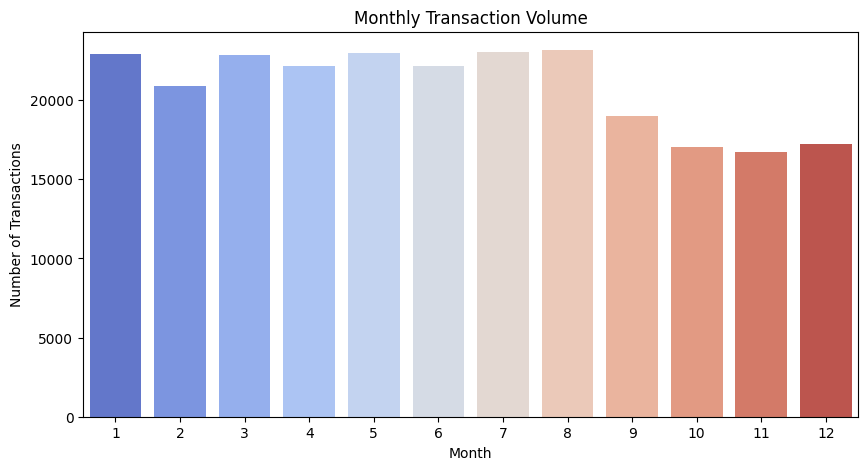

In [122]:
df['Purchase Month'] = df['Purchase Date'].dt.month
df['Avg Purchase per Item'] = df['Total Purchase Amount'] / df['Quantity']
bins = [0, 25, 35, 50, 70]
labels = ['Youth', 'Young Adult', 'Adult', 'Senior']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

plt.figure(figsize=(10,5))
sns.countplot(x='Purchase Month', data=df, palette='coolwarm')
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Age Group', y='Total Purchase Amount', data=df, palette='viridis')
plt.title('Total Average Purchases by Age Group')
plt.show()

/tmp/ipython-input-639950756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Total Purchase Amount', data=df, palette='viridis')


In [ ]:
bins = [17, 25, 35, 45, 55, 70]
labels = ['18–25', '26–35', '36–45', '46–55', '56–70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

age_group_summary = df.groupby('Age Group')['Total Purchase Amount'].mean().reset_index()
print("Average purchase per age group:\n", age_group_summary)

gender_churn_ct = pd.crosstab(df['Gender'], df['Churn'])
print("\nGender Distribution vs. Churn:\n", gender_churn_ct)

payment_summary = df.groupby('Payment Method')['Total Purchase Amount'].mean().reset_index()
print("\Average purchase per payment method:\n", payment_summary)

In [ ]:
import scipy.stats as stats

df = df.dropna(subset=['Age Group'])
groups = [group['Total Purchase Amount'].values for name, group in df.groupby('Age Group')]
f_stat, p_value = stats.f_oneway(*groups)

print("Hasil Uji ANOVA:")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("\n Kesimpulan: Tolak H₀. Ada perbedaan signifikan dalam rata-rata total pembelian antar kelompok umur.")
else:
    print("\n Kesimpulan: Gagal menolak H₀. Tidak ada perbedaan signifikan antar kelompok umur.")

In [ ]:
groups = [group['Total Purchase Amount'].values for name, group in df.groupby('Age Group', observed=False)]

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Total Purchase Amount'],
                          groups=df['Age Group'],
                          alpha=0.05)
print(tukey)

In [ ]:
import matplotlib.pyplot as plt
tukey.plot_simultaneous()
plt.title("Tukey HSD Test for Age Group Differences")
plt.show()